<a href="https://colab.research.google.com/github/shalman13091994/self_learning/blob/main/rgb_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here, ResNet50 for the image classifiation**

It skip the conversion or shortcuts to allow the gradients to pass through deeper
It solves the vanishing gradient problems
it gives high accuracy for more complex data

eg: going in the lift skipping the floor



STEPS INVOLVES:
1. Data Ingestion
2. EDA - resizing
3. Preprocessing - normalisation
4. Model Building/Architecture
5. Model Evaluation


1. **DATA INGESTION**

In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


In [2]:
# load dataset
import tensorflow as tf


In [19]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

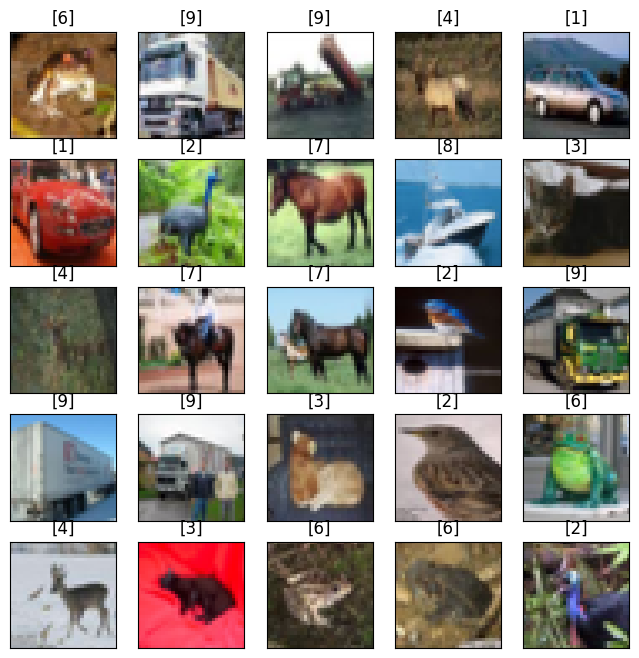

In [22]:
#visualisation the image

from matplotlib import pyplot as plt

# plt.imshow(X_train[0])
fig = plt.figure(figsize=(8,8))
for i in range(25):
  ax = fig.add_subplot(5,5,i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i])
  ax.set_title(y_train[i])



2.**EDA**

In [23]:
#Normalise the pixel size so divide by 255 to [0, 1]

x_train = X_train.astype('float')/255.0
x_test = X_test.astype('float')/255.0


In [24]:
# converting to 224x224 for RESNet since it take more time to compute

# x_train = tf.image.resize(x_train, (224,224))
# x_test = tf.image.resize(x_test, (224,224))


x_train = tf.image.resize(x_train, (32,32))
x_test = tf.image.resize(x_test, (32,32))

In [25]:
#normalisation for the categorical values y

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [26]:
print(f"y_train -- {y_train.shape}")
print(f"y_test -- {y_test.shape}")
print(f"x_train -- {x_train.shape}")
print(f"x_test -- {x_test.shape}")


y_train -- (50000, 10)
y_test -- (10000, 10)
x_train -- (50000, 32, 32, 3)
x_test -- (10000, 32, 32, 3)


3. **MODEL BUILDING/MODEL ARCHITECTURE**

here we r keeping the base model as ResNet50 and building the model

In [27]:
#load the ResNet50 model

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential



In [28]:
#base model with the  ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3)) #RESNet since it take more time to compute so passing as 32


# functional api so have to use like this

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
]) # CIFAR-10 has 10 classes





In [29]:
# compile the model
model.compile(optimizer='rmsprop',loss ='categorical_crossentropy', metrics=['accuracy'])


In [30]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [15]:
print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)
print(x_train.dtype, y_train.dtype)

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'numpy.ndarray'>
(50000, 224, 224, 3) (50000, 10)
<dtype: 'float32'> float64


In [ ]:
# Train the model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(x_train, y_train, batch_size=8, epochs=10, validation_data=(x_test, y_test), callbacks=[model_checkpoint, early_stopping], verbose=2, shuffle=True)


Epoch 1/10


5. **MODEL EVALUATION**

In [ ]:
# evaluate test accuracy
test_score = model.evaluate(X_test, y_test, verbose=0)

train_score = model.evaluate(x_train, y_train, verbose=0)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
